In [71]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
import os
import io

In [72]:
train = shuffle(pd.read_csv("./input/train.csv"))
test = shuffle(pd.read_csv("./input/test.csv"))

In [73]:
print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



In [74]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=train["Labels"],  # Make a crosstab
                            columns="count")      # Name the count column

train_outcome

col_0,count
Labels,
A,149
C,283
E,235
N,218
O,227


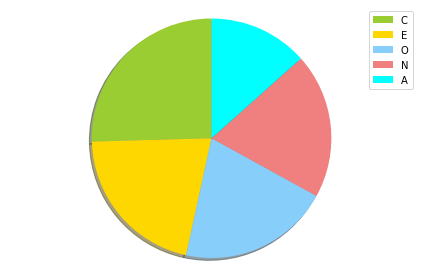

In [75]:
# Visualizing Outcome Distribution 
temp = train["Labels"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [76]:
def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

In [77]:
# this vectorizer will skip stop words
vectorizer = CountVectorizer(
    stop_words="english",
    preprocessor=clean_text,
    ngram_range=(1, 2),
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    #ngram_range=(1, 2)
    #min_df=3
)

# fit the vectorizer on the training text
trainfeatures=vectorizer.fit(train["Answers"])

# get the vectorizer's vocabulary
inv_vocab = {v: k for k, v in vectorizer.vocabulary_.items()}
vocabulary = [inv_vocab[i] for i in range(len(inv_vocab))]
len(vocabulary)

1717

In [78]:
# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(data=vectorizer.transform(train["Answers"]).toarray())
Y_train_label = train.Labels.values.astype(object)   
X_test = pd.DataFrame(data=vectorizer.transform(test["Answers"]).toarray())    
Y_test_label = test.Labels.values.astype(object)     
 
# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

Dimension of Train set (1112, 1717)
Dimension of Test set (18, 1717) 



In [79]:
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)
print (Y_train)
# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)
print (Y_test)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

names_of_predictors = list(X_train.columns.values)

[1 2 1 ... 4 2 4]
[4 4 4 2 2 1 0 1 3 1 3 1 4 4 1 0 1 1]
Number of numeric features: 1717


In [80]:
model = LogisticRegression(C=1.0,solver='lbfgs',multi_class='auto')
model.fit(X_train,Y_train)
predicted_classes = model.predict(X_test)
print (predicted_classes)
print (Y_test)
accuracy = accuracy_score(Y_test,predicted_classes)
accuracy

[4 4 1 2 2 1 0 1 1 1 3 1 4 4 1 0 1 1]
[4 4 4 2 2 1 0 1 3 1 3 1 4 4 1 0 1 1]


0.8888888888888888